In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library:
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions:
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Задание
- поделить на test и train (test не меньше чем 25%)
- подобрать наилучшее регрессию с GridSearch
- проанализировать признаки (features), отсортировать их по важности, выбрать 2 наиболее важные
- построить confusion_matrix для наилучшего регрессии

In [3]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [4]:
df = pd.read_csv('../datasets/diabetes.csv')
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
from sklearn.model_selection import GridSearchCV

In [10]:
params = {
    'C': [x/10.0 for x in range(1, 100)],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
clf = LogisticRegression()

search = GridSearchCV(clf, params, scoring='f1_micro')
search.fit(x,y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                               1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0,
                               2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, ...],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1_micro')

In [11]:
best_lr = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

0.7760971055088701
{'C': 4.8, 'penalty': 'l2', 'solver': 'lbfgs'}


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [14]:
y_pred = best_lr.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,  18],
       [ 23,  46]], dtype=int64)

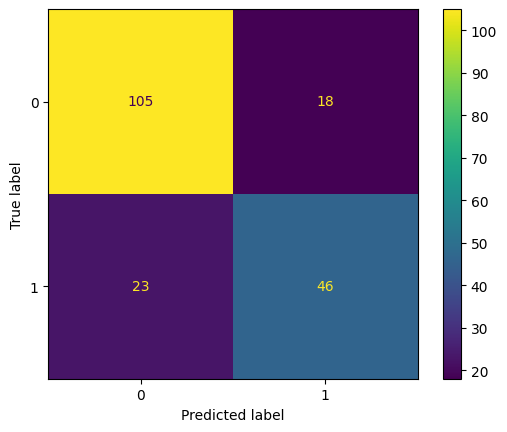

In [15]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Задание:
что лучше - решающее дерево или логистическая регрессия?

- найти наилучшее решающее дерево и сравнить f1_score с логистической регрессией